In [ ]:
library(boot)
library(stats)

## Confidence Intervals

You take a random sample of size n and calculate the sample mean. We use this sample mean as an *estimator* for the true population mean, also known as a "point estimate". A point estimate by itself is of limited usefulness because it does not reveal the uncertainty associated with the estimate or sampling method. Confidence intervals supply us with more information about the estimate by giving us an *interval*, with an associated *level of confidence*, that likely would contain the true population mean.  


* A confidence interval (CI) is an interval of values instead of a single point estimate.
* The level of confidence corresponds to the expected proportion of intervals that will contain the parameter if many confidence intervals are constructed of the same sample size from the same population. Another way of saying this is: 
    * 90% of confidence intervals computed at the 90% confidence level contain the true parameter
    * 95% of confidence intervals computed at the 95% confidence level contain the parameter
    * etc...
* Our uncertainty is about whether our particular CI is one of those that truly contains the true value of the parameter.
* Constructing confidence intervals requires knowledge about the sample distribution - sample mean and either population SD or sample SD. 
* Calculating CIs, theoretically, does not require that the population follow a normal distribution, however the math for such situations can get tricky. For this reason, if we know the population doesn't follow a normal, or we're just unsure, we can instead calculate an asymptotical CI on the *sample distribution for the sample mean* (according to the Central Limit Theorem, the sampling distribution for the sample mean approaches normal).  


General form:

sample statistic $\pm$ margin of error

margin of error $=$ multiplier(standard error)

From Lab 8, we learned standard error $= \frac{\hat\sigma}{\sqrt n}$. The multiplier is calculated using t-statistics from a t-distribution. (There's a lot of theory behind this, but in short - this distribution applies when a test statistic we're interested in would follow a normal distribution *if* the value of a scaling term in the test statistic were known. When it's unknown, the scaling term is replaced by an estimate based on the data (the SEM).) Other statistical methods can be used to calculate the multiplier, but the t-distribution is widely used for when we don't know the true population standar deviation (which we rarely do). 

### Example 
When the population follows a normal

In [ ]:
# draw a random sample from the normal distribution
n <- 50
x <- rnorm(n, 0, 1) 
x

In [ ]:
# histogram of the sample
hist(x)

In [ ]:
# sample mean
mean <- mean(x)
mean

**Question - Is there evidence that our true population mean is different from our sample mean?**

In [ ]:
# standard error of the mean
sem <- sd(x)/sqrt(n)
sem

In [ ]:
# confidence interval with a confidence level of 95%
ci <- c(mean-qt(0.975, n-1)*sem, mean+qt(0.975, n-1)*sem)
ci

How do we interpret this? 

We are 95% confident that the true mean is within the above CI. Because the interval is centered around our sample mean, the answer to the above question is **no, there is no evidence that our true population mean is different from our sample mean**. 

---

**Hypothesis Testing**

In [ ]:
# one-sample t-test
t.test(x)

We learned about one-sample t-tests in lecture, which determined whether our population mean was different from a particular value. We can also conduct two-sample t-tests to determine if there is a significant difference between the population means of two groups. Unlike the one-sample t-test, where the t-statistic is calculated using the difference between the sample mean and the value, divided by the standard error ($t = \frac{difference}{standard error}$), the t-statistic for a two-sample t-test is $t = \frac{difference of group averages}{standard error of difference}$. We then compare this t-statistic to a t-value, which depends on our chosen significance value and degrees of freedom. 

In [ ]:
# two-sample t-test
# draw a random sample from the normal distribution
n <- 50
y <- rnorm(n, 0, 1) 
print(mean(y))
t.test(x, y)


---
As mentioned, if the population doesn't follow a normal distribution, or we're unsure, we can construct a CI on the sampling distribution of the sample mean. However, collecting multiple samples, from which we can calculate sample means, is not always feasible. This is where bootstrapping comes in handy.

## Bootstrapping

How it works:

Bootstrapping resamples the original dataset with replacement many thousands of times to create simulated datasets. This process involves drawing random samples from the original dataset. Breaking it down:

* The bootstrap method has an equal probability of randomly drawing each original data point for inclusion in the resampled datasets.
* The procedure can select a data point more than once for a resampled dataset. This property is the “with replacement” aspect of the process.
* The procedure creates resampled datasets that are the same size as the original dataset.

The process ends with your simulated datasets having many different combinations of the values that exist in the original dataset. Each simulated dataset has its own set of sample statistics, such as the mean. Bootstrapping procedures use the distribution of the sample statistics across the simulated samples as the sampling distribution.

Keep in mind that bootstrapping does not create new data. Instead, it treats the original sample as a proxy for the real population and then draws random samples from it. Consequently, the central assumption for bootstrapping is that the original sample accurately represents the actual population. The resampling process creates many possible samples that a study could have drawn. The various combinations of values in the simulated samples collectively provide an estimate of the variability between random samples drawn from the same population. The range of these potential samples allows the procedure to construct confidence intervals and perform hypothesis testing. Importantly, as the sample size increases, bootstrapping converges on the correct sampling distribution under most conditions.

### Example 
When the population doesn't follow a normal (or we're uncertain).

#### Manual bootstrapping:

In [ ]:
# sample data for male cat body weight

data <- data.frame(weight = c(catsM$Bwt))
n <- length(data$weight)
data

In [ ]:
# histogram of cat body weight 
hist(data$weight, breaks=10)

In [ ]:
# mean of cat body weight
mean <- mean(data$weight)
mean

In [ ]:
# create 30 bootstrap samples and calculate their sample means
bootReps <- 30
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [ ]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

In [ ]:
# create 100 bootstrap samples and calculate their sample means
bootReps <- 100
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [ ]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

In [ ]:
# create 1000 bootstrap samples and calculate their sample means
bootReps <- 1000
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [ ]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

Notice how the sampling distribution in the histogram approximates a normal distribution even though the underlying data distribution is not. This approximation occurs thanks to the central limit theorem. As the sample size increases, the sampling distribution converges on a normal distribution regardless of the underlying data distribution (with a few exceptions).

We can compare our original sample mean to the context of our simulated sample distribution.

#### Using `boot()`:

`boot()` calls the statistic function R times. Each time, it generates a set of random indices, with replacement, from the integers `1:nrow(data)`. These indices are used within the statistic function to select a sample. The statistics are calculated on the sample and the results are accumulated in the bootobject. 

**Note:** The function should include an indices parameter that the `boot()` function can use to select cases for each replication. Refer to example.

In [ ]:
?boot

In [ ]:
# create the `statistic` function for the mean
mean_fun <- function(data,index){
  return(mean(data[index,]))
}

In [ ]:
# run a bootstrap analysis for 30 replicates
res <- boot(data = data, R=30, statistic = mean_fun)
res

In [ ]:
res$t

In [ ]:
plot(res)

In [ ]:
boot.ci(res, conf = 0.95, type = "norm")

In [ ]:
# run a bootstrap analysis for 100 replicates
res <- boot(data = data, R=100, statistic = mean_fun)
res

In [ ]:
plot(res)

In [ ]:
boot.ci(res, conf = 0.95, type = "norm")

In [ ]:
# run a bootstrap analysis for 1000 replicates
res <- boot(data = data, R=1000, statistic = mean_fun)
res

In [ ]:
plot(res)

In [ ]:
boot.ci(res, conf = 0.95, type = "norm")

In [ ]:
mean <- mean(res$t)
sem <- sd(res$t)/sqrt(1000)
ci <- c(mean - qt(0.975, 999)*sem, mean + qt(0.975, 999)*sem)
ci

**Question - Is there a statistically significant difference in weights between male and female cats?**

In [ ]:
# is there a statistically significant difference in weights between male and female cats?
library(MASS)
t.test(Bwt ~ Sex, data = cats)

## Assignment

In [5]:
library(boot)

1. Load the `iris` dataset, and find the mean and SEM of the `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`.

In [1]:
meanSepLen <- mean(iris$Sepal.Length)
meanSepWid <- mean(iris$Sepal.Width)
meanPetLen <- mean(iris$Petal.Length)
meanPetWid <- mean(iris$Petal.Width)

semSepLen <- sd(iris$Sepal.Length) / length(iris$Sepal.Length)
semSepWid <- sd(iris$Sepal.Width) / length(iris$Sepal.Width)
semPetLen <- sd(iris$Petal.Length) / length(iris$Petal.Length)
semPetWid <- sd(iris$Petal.Width) / length(iris$Petal.Width)

2. Calculate the variance of `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`.

In [2]:
varSepLen <- var(iris$Sepal.Length)
varSepWid <- var(iris$Sepal.Width)
varPetLen <- var(iris$Petal.Length)
varPetWid <- var(iris$Petal.Width)

3. Using the values calculated above, obtain the 95% confidence interval of the mean for `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`. What determines the range of the confidence interval? Report the confidence interval as a vector of the lower and upper bounds : `c(lower bound of CI, upper bound of CI)`.

In [3]:
sepLenCI <- c(meanSepLen - qt(0.975, length(iris$Sepal.Length) - 1)*semSepLen, meanSepLen + qt(0.975, length(iris$Sepal.Length) - 1)*semSepLen)
sepWidCI <- c(meanSepWid - qt(0.975, length(iris$Sepal.Width) - 1)*semSepWid, meanSepWid + qt(0.975, length(iris$Sepal.Width) - 1)*semSepWid)
petLenCI <- c(meanPetLen - qt(0.975, length(iris$Petal.Length) - 1)*semPetLen, meanPetLen + qt(0.975, length(iris$Petal.Length) - 1)*semPetLen)
petWidCI <- c(meanPetWid - qt(0.975, length(iris$Petal.Width) - 1)*semPetWid, meanPetWid + qt(0.975, length(iris$Petal.Width) - 1)*semPetWid)

The range of the confidence interval is determined by the standard error of the mean (variability in the mean), as well as the value of the t-statistic corresponding to 97.5% of the area under the t-distribution.

4. Using `boot()`, obtain 500 bootstrap samples out of `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`:

    (a) Create a histogram of the bootstrap sample means

    (b) Find the 95% bootstrap confidence intervals

In [6]:
mean_fun <- function(data,index){
  return(mean(data[index,]))
}

sepLenMeans <- boot(data = as.data.frame(iris$Sepal.Length), R=500, statistic = mean_fun)
sepWidMeans <- boot(data = as.data.frame(iris$Sepal.Width), R=500, statistic = mean_fun)
petLenMeans <- boot(data = as.data.frame(iris$Petal.Length), R=500, statistic = mean_fun)
petWidMeans <- boot(data = as.data.frame(iris$Petal.Width), R=500, statistic = mean_fun)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = sepLenMeans, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 5.705,  5.975 )  
Calculations and Intervals on Original Scale

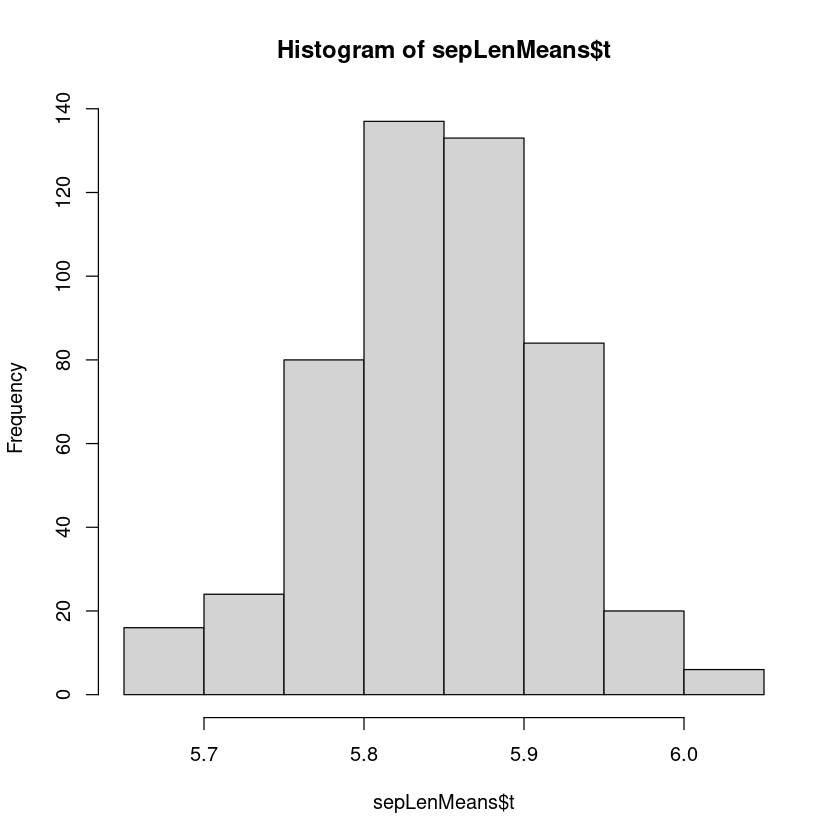

In [7]:
hist(sepLenMeans$t)
boot.ci(sepLenMeans, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = sepWidMeans, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 2.986,  3.124 )  
Calculations and Intervals on Original Scale

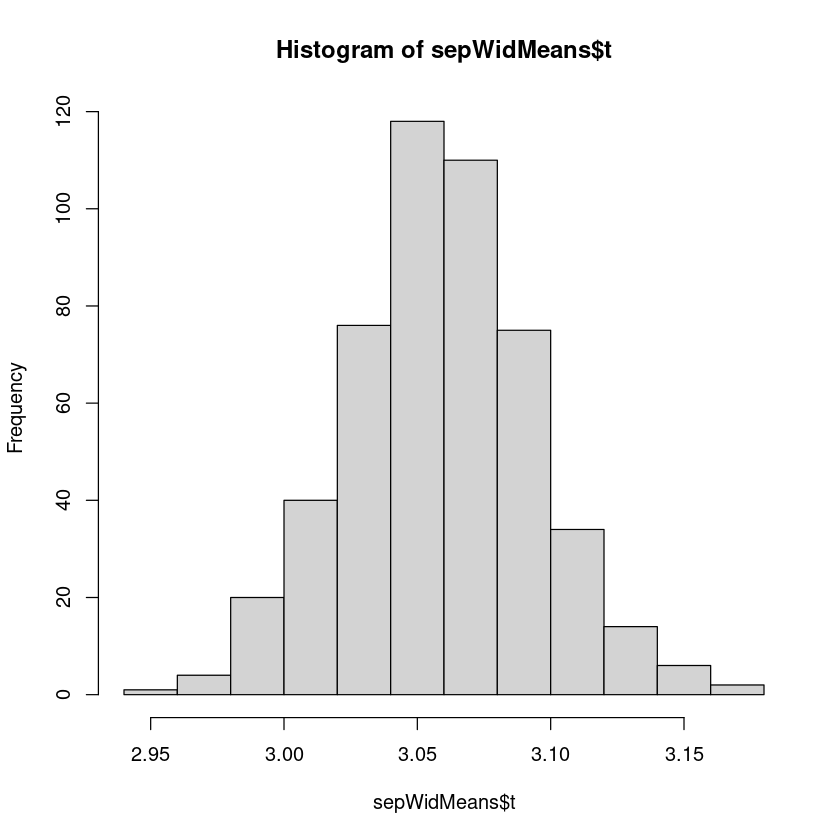

In [8]:
hist(sepWidMeans$t)
boot.ci(sepWidMeans, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = petLenMeans, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 3.488,  4.037 )  
Calculations and Intervals on Original Scale

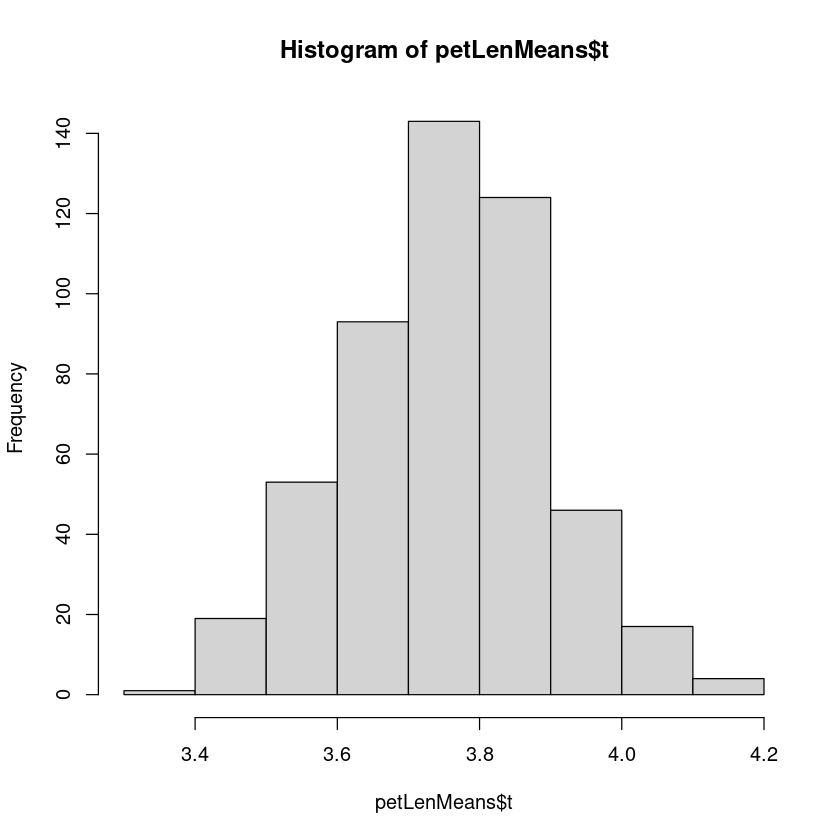

In [9]:
hist(petLenMeans$t)
boot.ci(petLenMeans, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = petWidMeans, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 1.084,  1.324 )  
Calculations and Intervals on Original Scale

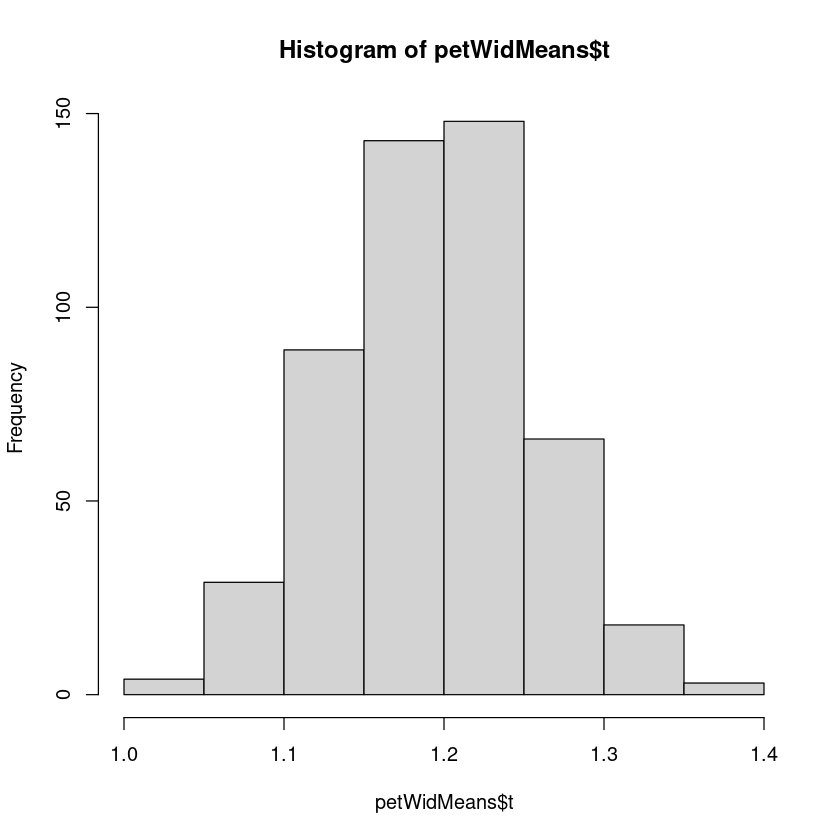

In [10]:
hist(petWidMeans$t)
boot.ci(petWidMeans, conf = 0.95, type = "norm")

5. Perform a t-test between all combinations of the four datasets (that would be a total of 4 choose 2 = 6 combinations). See if there is any statistically significant difference (p < 0.05) between any of the four parameters defining the `iris`.

In [11]:
# Note: it was assumed for this question that we are to test for significant differences between the original iris datasets' means, not the bootstrapped ones.

# Sepal Length and Sepal Width
t.test(iris$Sepal.Length, iris$Sepal.Width)


	Welch Two Sample t-test

data:  iris$Sepal.Length and iris$Sepal.Width
t = 36.463, df = 225.68, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.63544 2.93656
sample estimates:
mean of x mean of y 
 5.843333  3.057333 


In [12]:
# Sepal Length and Petal Length
t.test(iris$Sepal.Length, iris$Petal.Length)


	Welch Two Sample t-test

data:  iris$Sepal.Length and iris$Petal.Length
t = 13.098, df = 211.54, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.771500 2.399166
sample estimates:
mean of x mean of y 
 5.843333  3.758000 


In [13]:
# Sepal Length and Petal Width
t.test(iris$Sepal.Length, iris$Petal.Width)


	Welch Two Sample t-test

data:  iris$Sepal.Length and iris$Petal.Width
t = 50.536, df = 295.98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.46315 4.82485
sample estimates:
mean of x mean of y 
 5.843333  1.199333 


In [14]:
# Sepal Width and Petal Length
t.test(iris$Sepal.Width, iris$Petal.Length)


	Welch Two Sample t-test

data:  iris$Sepal.Width and iris$Petal.Length
t = -4.7194, df = 167.1, p-value = 4.975e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9937746 -0.4075587
sample estimates:
mean of x mean of y 
 3.057333  3.758000 


In [15]:
# Sepal Width and Petal Width
t.test(iris$Sepal.Width, iris$Petal.Width)


	Welch Two Sample t-test

data:  iris$Sepal.Width and iris$Petal.Width
t = 25.916, df = 237.03, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.716763 1.999237
sample estimates:
mean of x mean of y 
 3.057333  1.199333 


In [16]:
# Petal Length and Petal Width
t.test(iris$Petal.Length, iris$Petal.Width)


	Welch Two Sample t-test

data:  iris$Petal.Length and iris$Petal.Width
t = 16.297, df = 202.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.249107 2.868227
sample estimates:
mean of x mean of y 
 3.758000  1.199333 


Since all the p-values for means of all combinations of ‘iris’ parameters are less than 0.05 (most are less than 2.2e-16), there is a statistically significant difference between all four parameters defining the ‘iris’: Sepal Length, Sepal Width, Petal Length, and Petal Width.